<h2 style="color:green" align="center">Predicting if a person would buy life insurnace based on his age using logistic regression</h2>

Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't).

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


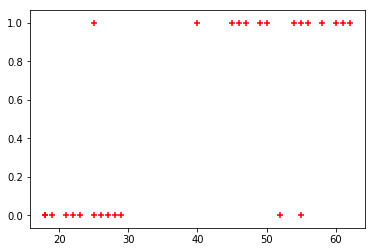

In [ ]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)

In [ ]:
X_test

,age
4,46
8,62
26,23
17,58
24,50
25,54


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
X_test

,age
16,25
21,26
2,47


In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
model.predict_proba(X_test)

array([[0.40569485, 0.59430515],
       [0.26002994, 0.73997006],
       [0.63939494, 0.36060506],
       [0.29321765, 0.70678235],
       [0.36637568, 0.63362432],
       [0.32875922, 0.67124078]])

In [ ]:
model.score(X_test,y_test)

1.0

In [ ]:
y_predicted

array([1, 1, 0, 1, 1, 1], dtype=int64)

In [ ]:
X_test

,age
4,46
8,62
26,23
17,58
24,50
25,54


**model.coef_ indicates value of m in y=m*x + b equation**

In [ ]:
model.coef_

array([[0.04150133]])

**model.intercept_ indicates value of b in y=m*x + b equation**

In [ ]:
model.intercept_

array([-1.52726963])

**Lets defined sigmoid function now and do the math with hand**

In [ ]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [ ]:
def prediction_function(age):
    z = 0.042 * age - 1.53 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y

In [ ]:
age = 35
prediction_function(age)

0.4850044983805899

**0.485 is less than 0.5 which means person with 35 age will *not* buy insurance**
**0.485 is more than 0.5 which means person with 43 will buy the insurance**

In [ ]:
age = 43
prediction_function(age)

0.568565299077705

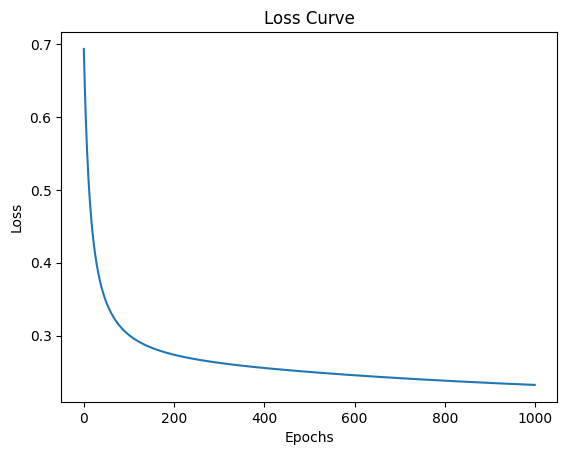

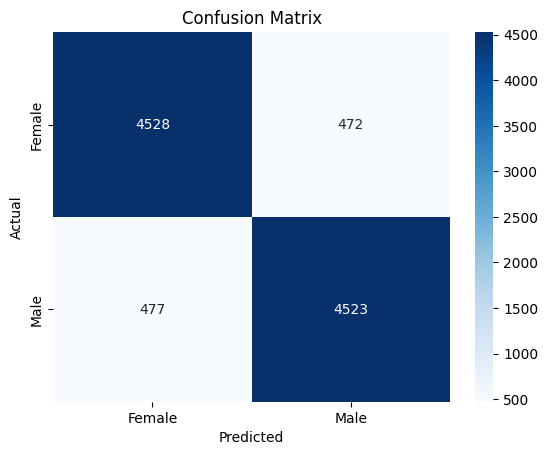

              precision    recall  f1-score   support

      Female       0.90      0.91      0.91      5000
        Male       0.91      0.90      0.91      5000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# ---------------------------
# Step 1: Load dataset
# ---------------------------
df = pd.read_csv("/content/weight-height.csv")

# Encode Gender: Male = 1, Female = 0
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

X = df[['Height', 'Weight']].values
y = df['Gender'].values.reshape(-1, 1)

# Normalize features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Add bias term (intercept)
X = np.hstack([np.ones((X.shape[0], 1)), X])  # shape (n, 3)

# ---------------------------
# Step 2: Sigmoid Function
# ---------------------------
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# ---------------------------
# Step 3: Loss Function (Binary Cross Entropy)
# ---------------------------
def compute_loss(y, y_pred):
    m = len(y)
    epsilon = 1e-8  # avoid log(0)
    return - (1/m) * np.sum(y * np.log(y_pred + epsilon) + (1-y) * np.log(1 - y_pred + epsilon))

# ---------------------------
# Step 4: Gradient Descent
# ---------------------------
def gradient_descent(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    theta = np.zeros((n, 1))  # initialize parameters
    loss_history = []

    for _ in range(epochs):
        z = np.dot(X, theta)
        y_pred = sigmoid(z)
        error = y_pred - y

        grad = (1/m) * np.dot(X.T, error)
        theta -= lr * grad

        loss = compute_loss(y, y_pred)
        loss_history.append(loss)

    return theta, loss_history

# ---------------------------
# Step 5: Train Model
# ---------------------------
theta, loss_history = gradient_descent(X, y, lr=0.1, epochs=1000)

# ---------------------------
# Step 6: Predictions
# ---------------------------
y_pred_prob = sigmoid(np.dot(X, theta))
y_pred = (y_pred_prob >= 0.5).astype(int)

# ---------------------------
# Step 7: Plot Loss Curve
# ---------------------------
plt.plot(loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.show()

# ---------------------------
# Step 8: Confusion Matrix
# ---------------------------
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Female", "Male"],
            yticklabels=["Female", "Male"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ---------------------------
# Step 9: Classification Report
# ---------------------------
print(classification_report(y, y_pred, target_names=["Female", "Male"]))


<h2 style="color:purple">Exercise</h2>

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.
1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model

In [1]:
from google.colab import files
files.upload()

Saving HR_comma_sep.csv to HR_comma_sep.csv


{'HR_comma_sep.csv': b'satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary\r\n0.38,0.53,2,157,3,0,1,0,sales,low\r\n0.8,0.86,5,262,6,0,1,0,sales,medium\r\n0.11,0.88,7,272,4,0,1,0,sales,medium\r\n0.72,0.87,5,223,5,0,1,0,sales,low\r\n0.37,0.52,2,159,3,0,1,0,sales,low\r\n0.41,0.5,2,153,3,0,1,0,sales,low\r\n0.1,0.77,6,247,4,0,1,0,sales,low\r\n0.92,0.85,5,259,5,0,1,0,sales,low\r\n0.89,1,5,224,5,0,1,0,sales,low\r\n0.42,0.53,2,142,3,0,1,0,sales,low\r\n0.45,0.54,2,135,3,0,1,0,sales,low\r\n0.11,0.81,6,305,4,0,1,0,sales,low\r\n0.84,0.92,4,234,5,0,1,0,sales,low\r\n0.41,0.55,2,148,3,0,1,0,sales,low\r\n0.36,0.56,2,137,3,0,1,0,sales,low\r\n0.38,0.54,2,143,3,0,1,0,sales,low\r\n0.45,0.47,2,160,3,0,1,0,sales,low\r\n0.78,0.99,4,255,6,0,1,0,sales,low\r\n0.45,0.51,2,160,3,1,1,1,sales,low\r\n0.76,0.89,5,262,5,0,1,0,sales,low\r\n0.11,0.83,6,282,4,0,1,0,sales,low\r\n0.38,0.55,2,147,3,0,1,0,sales,low\r\n0.09,0.95,6

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.info()
df.isnull().sum()
# df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
Department,0
salary,0


In [6]:
# Strip column names of whitespace
df.columns = df.columns.str.strip()

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Map salary to numeric
df['salary'] = df['salary'].map({'low': 1, 'medium': 2, 'high': 3})

# One-hot encode department
df = pd.get_dummies(df, columns=['Department'], drop_first=True)

df.head()


Missing Values:
 satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,1,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,2,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,2,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,1,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,1,False,False,False,False,False,False,True,False,False


/tmp/ipython-input-3537988503.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='left', data=df, palette='coolwarm')


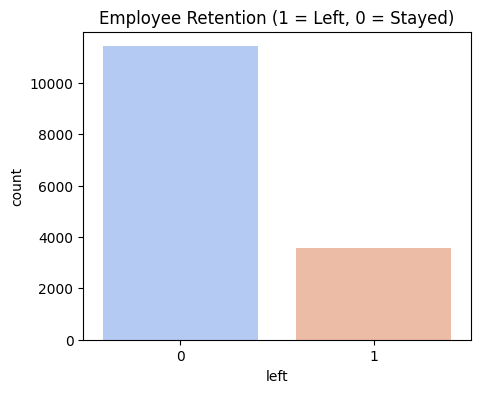

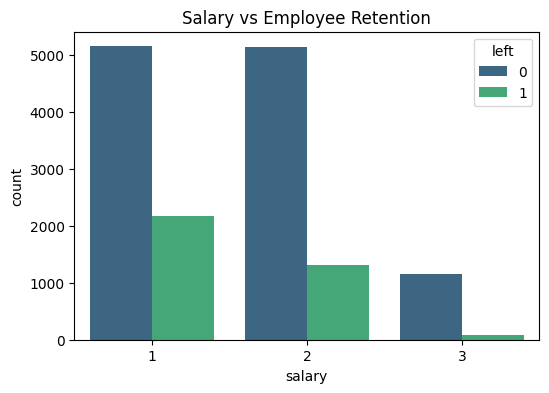

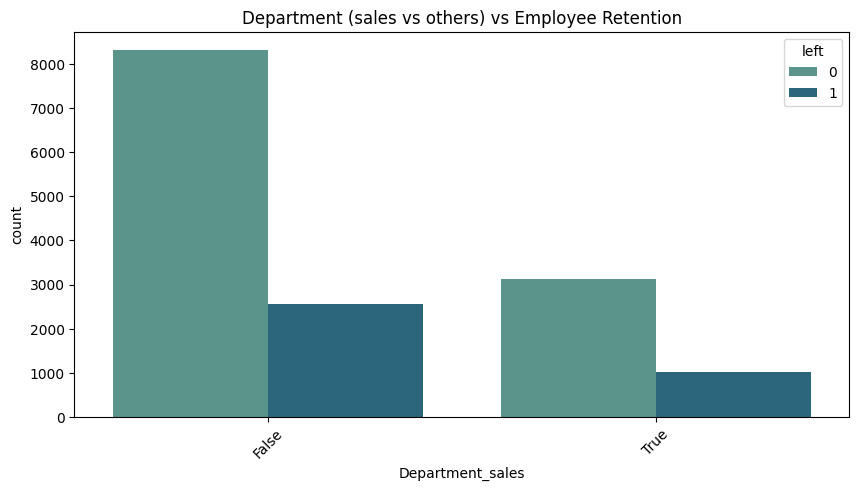

In [7]:

# 4.1 Retention Distribution
plt.figure(figsize=(5,4))
sns.countplot(x='left', data=df, palette='coolwarm')
plt.title('Employee Retention (1 = Left, 0 = Stayed)')
plt.show()

# 4.2 Salary vs Retention
plt.figure(figsize=(6,4))
sns.countplot(x='salary', hue='left', data=df, palette='viridis')
plt.title('Salary vs Employee Retention')
plt.show()

# 4.3 Department vs Retention
plt.figure(figsize=(10,5))
sns.countplot(x='Department_sales', hue='left', data=df, palette='crest')
plt.title('Department (sales vs others) vs Employee Retention')
plt.xticks(rotation=45)
plt.show()

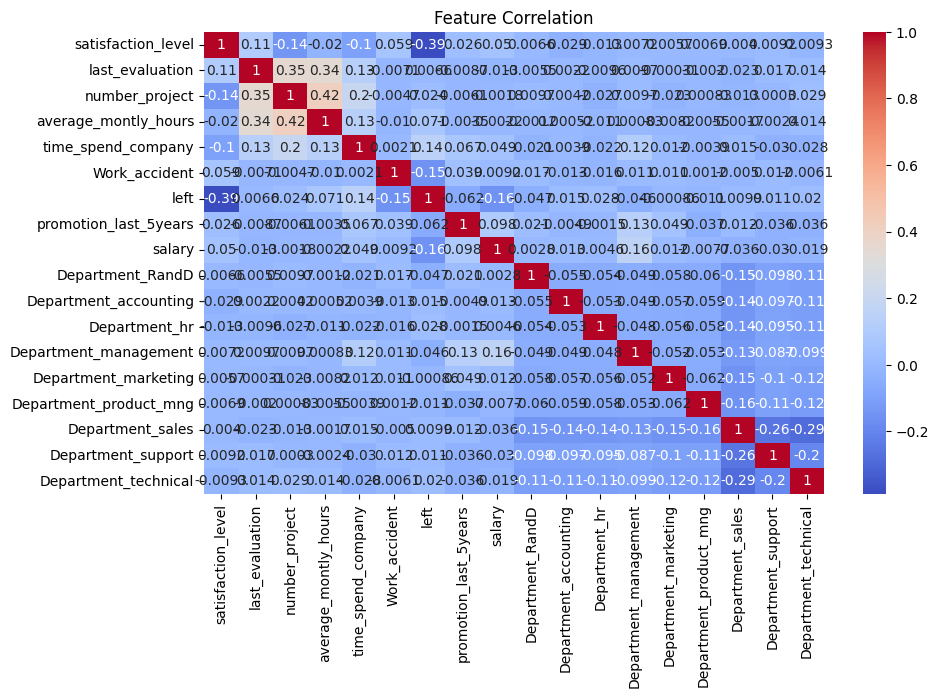

In [8]:
# 4.4 Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

In [9]:

# Drop target column
X = df.drop('left', axis=1)
y = df['left']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 10499
Testing samples: 4500


In [10]:

# 6. Build Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [11]:

# 7. Model Evaluation
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

 Accuracy: 0.7931111111111111

 Confusion Matrix:
 [[3168  261]
 [ 670  401]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      3429
           1       0.61      0.37      0.46      1071

    accuracy                           0.79      4500
   macro avg       0.72      0.65      0.67      4500
weighted avg       0.77      0.79      0.77      4500



/tmp/ipython-input-1190693200.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coeff_df, palette='mako')


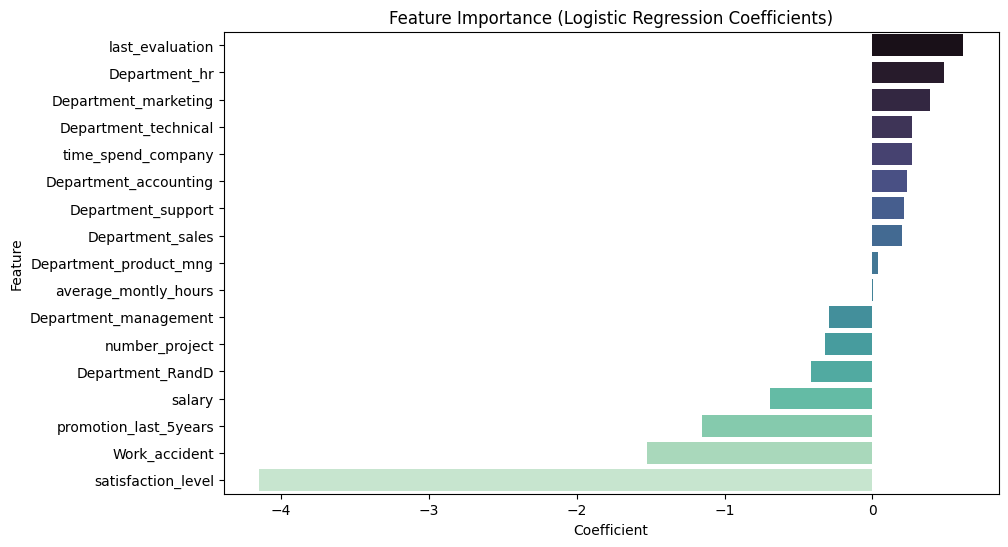

In [12]:
# 8. Feature Importance
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df, palette='mako')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.show()